In [21]:
import cython
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm
import pandas as pd

import os, json

from matplotlib.image import imread

from theano import scan
import theano.tensor as tt

from pymc3.distributions import continuous
from pymc3.distributions import distribution

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
K = 4
n = 100
mu_0 = {0: [10, 10],
        1: [20, 20],
        2: [22, 14],
        3: [11, 16]}

sigma_0 = np.array([[1, 0],
                    [0, 1]])

pi = [0.15, 0.25, 0.15, 0.45]

In [3]:
x = {i: np.random.multivariate_normal(mean=mu_0[i], 
                                      cov=sigma_0, 
                                      size=[np.random.randint(low=15, high=50, size=None)]) for i in range(K)}

x = []
cluster = []

for _ in range(n):
    x_cluster = np.random.choice([0, 1, 2, 3], size=[1,], p=pi)[0]
    x.append(np.random.multivariate_normal(mean=mu_0[x_cluster],
                                           cov=sigma_0,
                                           size=[1,]).tolist()[0])
    cluster.append(x_cluster)
    
x = np.array(x)

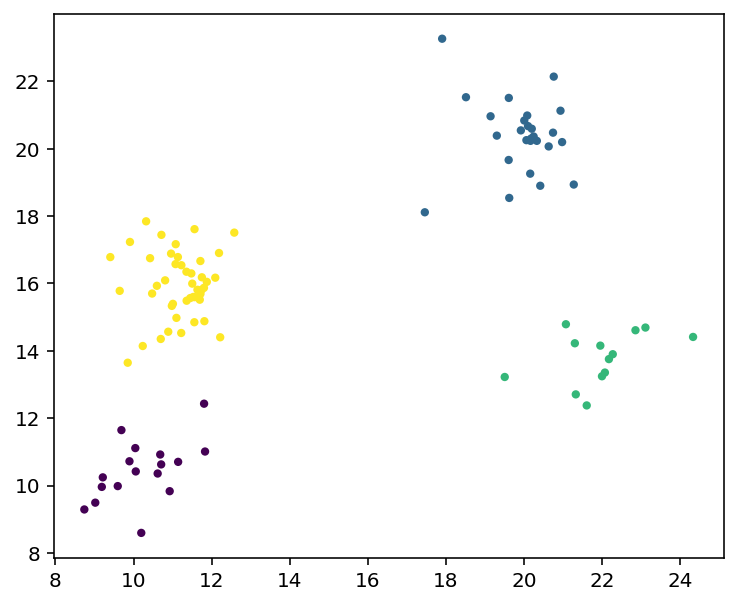

In [4]:
fig = plt.figure(figsize=(6, 5))
plt.scatter(x[:, 0], x[:, 1], s=10, c=cluster)

In [5]:
with pm.Model() as model:
    p = pm.Dirichlet("p", a=[2, 2, 2, 2])
    Sigma = pm.LKJCholeskyCov("cov", n=2, eta=2, sd_dist=pm.HalfCauchy.dist(2.5, shape=2))
    L = pm.expand_packed_triangular(2, Sigma)
    
    category = pm.Categorical("category", p=p)
    
    mean = pm.MvNormal("mean", mu=np.tile(15, 8).reshape(4, 2), cov=np.array([[10, 0], [0, 10]]), shape=(4, 2))
    obs  = pm.MvNormal("obs", mu=mean[category], chol=L, observed=x)
    
#     trace = pm.sample(draws=2000, chains=3, tune=2000)
#     posterior_pred = pm.sample_posterior_predictive(trace)

/home/larry/anaconda3/envs/pymc3/lib/python3.8/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/home/larry/anaconda3/envs/pymc3/lib/python3.8/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


In [23]:
results = {}

for chain in range(len(os.listdir("trace_mixture_2000/"))):
    with open(f"trace_mixture_2000/{chain}/metadata.json", "r") as file:
        results[chain] = json.load(file)

In [27]:
pm

dict_keys(['draw_idx', 'draws', '_stats', 'chain', 'sampler_vars'])